# Machine Learn - Predict Like/Dislike User Song


#### more details https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

###### EN: Summary: With a set of songs whose answers already exist (I like or dislike the song), part of the samples is taken to train the learning algorithm to check if it is able to hit on the tastes (or not) of the other part of the songs. And why not about the general tastes of a real user?
###### PT: Resumo: Com um conjunto de músicas cujas respostas já existem ( Gosto ou Não Gosto da música ), retira-se parte das amostras para treinar o algoritmo de aprendizado para verificar se o mesmo é capaz de acertar sobre os gostos (ou não) da outra parte das canções. E porque não sobre os gostos gerais de um usuário real?

In [1]:
import pandas as pd # Sort data in tabular format
import numpy as np # Scientific computing packags

# Methods ML
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt # Visualization Library
import seaborn as sns # Plot charts more nicely

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline


### Spotify Song Attributes EDA 
- Import Dataset
- EDA to visualize data and observe structure
- Train a classifier (Decision Tree , +)
- Predict target using the trained classifier

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
train, test = train_test_split(data, test_size = 0.10)

In [7]:
print( ' Trainning size: {} , Test size: {}'.format(len(train),len(test)))

 Trainning size: 1815 , Test size: 202


In [8]:
print( 'Data Size: {}'.format( len(data)))

Data Size: 2017


In [9]:
train.shape

(1815, 17)

In [10]:
red_blue = [ '#3498db','#e74c3c']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

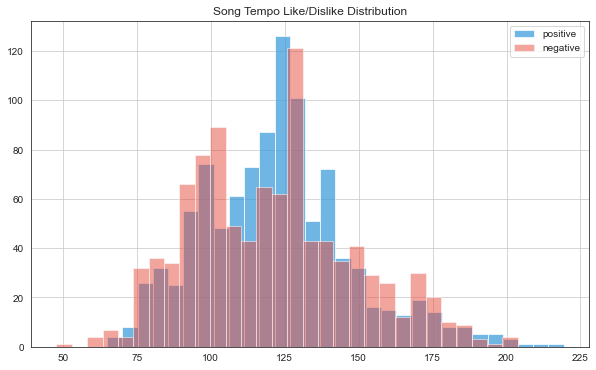

In [11]:
pos = data[data['target'] == 1 ]['tempo']
neg = data[data['target'] == 0 ]['tempo']
fig = plt.figure( figsize = ( 10, 6))
plt.title( 'Song Tempo Like/Dislike Distribution')
pos.hist(bins=30 , alpha = 0.7 , label = 'positive')
neg.hist(bins=30 , alpha = 0.5 , label = 'negative' )
plt.legend(loc = "upper right")

In [12]:
pos_dance = data[data['target'] == 1 ]['danceability']
neg_dance = data[data['target'] == 0 ]['danceability']
pos_duration = data[data['target'] == 1 ]['duration_ms']
neg_duration = data[data['target'] == 0 ]['duration_ms']
pos_loudness = data[data['target'] == 1 ]['loudness']
neg_loudness = data[data['target'] == 0 ]['loudness']
pos_speech = data[data['target'] == 1 ]['speechiness']
neg_speech = data[data['target'] == 0 ]['speechiness']
pos_valence = data[data['target'] == 1 ]['valence']
neg_valence = data[data['target'] == 0 ]['valence']
pos_energy = data[data['target'] == 1 ]['energy']
neg_energy = data[data['target'] == 0 ]['energy']
pos_acoustic = data[data['target'] == 1 ]['acousticness']
neg_acoustic = data[data['target'] == 0 ]['acousticness']
pos_key = data[data['target'] == 1 ]['key']
neg_key = data[data['target'] == 0 ]['key']
pos_instru = data[data['target'] == 1 ]['instrumentalness']
neg_instru = data[data['target'] == 0 ]['instrumentalness']


###### Let's do this!!

<ipython-input-13-58205208f69d>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(331)
<ipython-input-13-58205208f69d>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(332)
<ipython-input-13-58205208f69d>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always 

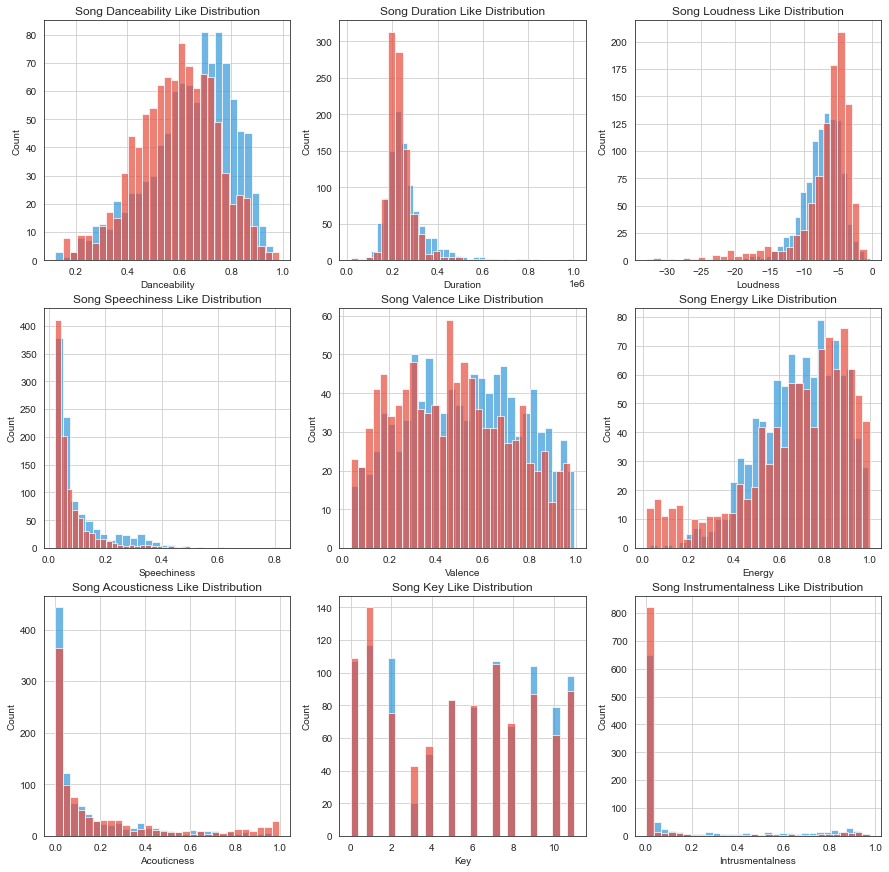

In [13]:
fig2 = plt.figure( figsize = (15,15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist( bins = 30, alpha = 0.7)
ax4 = fig2.add_subplot(331)
neg_dance.hist( bins = 30, alpha = 0.7)

# Duration
ax3 = fig2.add_subplot(332)
ax3.set_xlabel('Duration')
ax3.set_ylabel('Count')
ax3.set_title('Song Duration Like Distribution')
pos_duration.hist( bins = 30, alpha = 0.7)
ax4 = fig2.add_subplot(332)
neg_duration.hist( bins = 30, alpha = 0.7)

# Loudness
ax3 = fig2.add_subplot(333)
ax3.set_xlabel('Loudness')
ax3.set_ylabel('Count')
ax3.set_title('Song Loudness Like Distribution')
pos_loudness.hist( bins = 30, alpha = 0.7)
ax4 = fig2.add_subplot(333)
neg_loudness.hist( bins = 30, alpha = 0.7)

# Speechiness
ax3 = fig2.add_subplot(334)
ax3.set_xlabel('Speechiness')
ax3.set_ylabel('Count')
ax3.set_title('Song Speechiness Like Distribution')
pos_speech.hist( bins = 30, alpha = 0.7)
ax4 = fig2.add_subplot(334)
neg_speech.hist( bins = 30, alpha = 0.7)

# Valence
ax3 = fig2.add_subplot(335)
ax3.set_xlabel('Valence')
ax3.set_ylabel('Count')
ax3.set_title('Song Valence Like Distribution')
pos_valence.hist( bins = 30, alpha = 0.7)
ax4 = fig2.add_subplot(335)
neg_valence.hist( bins = 30, alpha = 0.7)

# Energy
ax3 = fig2.add_subplot(336)
ax3.set_xlabel('Energy')
ax3.set_ylabel('Count')
ax3.set_title('Song Energy Like Distribution')
pos_energy.hist( bins = 30, alpha = 0.7)
ax4 = fig2.add_subplot(336)
neg_energy.hist( bins = 30, alpha = 0.7)

# Acousticness
ax3 = fig2.add_subplot(337)
ax3.set_xlabel('Acouticness')
ax3.set_ylabel('Count')
ax3.set_title('Song Acousticness Like Distribution')
pos_acoustic.hist( bins = 30, alpha = 0.7)
ax4 = fig2.add_subplot(337)
neg_acoustic.hist( bins = 30, alpha = 0.7)

# Key
ax3 = fig2.add_subplot(338)
ax3.set_xlabel('Key')
ax3.set_ylabel('Count')
ax3.set_title('Song Key Like Distribution')
pos_key.hist( bins = 30, alpha = 0.7)
ax4 = fig2.add_subplot(338)
neg_key.hist( bins = 30, alpha = 0.7)


# Instrumentalness
ax3 = fig2.add_subplot(339)
ax3.set_xlabel('Intrusmentalness')
ax3.set_ylabel('Count')
ax3.set_title('Song Instrumentalness Like Distribution')
pos_instru.hist( bins = 30, alpha = 0.7)
ax4 = fig2.add_subplot(339)
neg_instru.hist( bins = 30, alpha = 0.7)

In [14]:
c = DecisionTreeClassifier(min_samples_split = 100)

In [15]:
features = ['danceability','loudness','valence','energy','instrumentalness','acousticness','key','speechiness','duration_ms']

In [16]:
x_train = train[features]
y_train = train['target']

x_test = test[features]
y_test = test['target']

# Decision Tree

In [17]:
decisiontree = c.fit(x_train,y_train)

In [18]:
def show_tree( tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names= features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

In [19]:
#show_tree(decisiontree,features,'dec_tree_01.png')

In [20]:
y_pred = c.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
score = accuracy_score(y_test, y_pred)*100

In [23]:
print("Accuracy : ", round(score, 1), "%")

Accuracy :  73.3 %


# KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(3)

In [26]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
knn_pred = c.predict(x_test)

In [28]:
score2 = accuracy_score(y_test,knn_pred)*100

In [29]:
print("Accuracy : ", round(score2, 1), "%")

Accuracy :  73.3 %


# GBC

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
predicted = gbc.predict(x_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy : ", round(score, 1), "%")

Accuracy :  77.7 %
